In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.metrics import accuracy_score
from keras.models import Sequential
import keras
from keras.layers import Dense,Activation, Dropout
from keras.losses import categorical_crossentropy

Using TensorFlow backend.
D:\Users\Taseen-PC\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\Taseen-PC\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\Taseen-PC\Miniconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\Taseen-PC\Miniconda3\lib\site-packages\tensorflow\python

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'neural-network-weed-detection-master',
 'Weed detection Soybean keras.ipynb',
 'Weed detection Soybean.ipynb',
 'weed-detection-in-soybean-crops']

In [3]:
path = './weed-detection-in-soybean-crops'

In [4]:
labels = {'broadleaf':0, 'grass':1, 'soil':2, 'soybean':3}

In [5]:
files = []
doc = {}
for sub_dir in ['broadleaf', 'grass', 'soil', 'soybean']:
    for file in os.listdir(os.path.join(path, sub_dir)):
        image = cv2.imread(os.path.join(path, sub_dir, file))
        image = cv2.resize(image, (100,100))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.flatten()
        doc = {'label': labels[sub_dir],'image': image}
        files.append(doc)
        
img = pd.DataFrame(files, dtype='int')

In [6]:
img.head(5)

,image,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


In [7]:
img['image'][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [8]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15336 entries, 0 to 15335
Data columns (total 2 columns):
image    15336 non-null object
label    15336 non-null int32
dtypes: int32(1), object(1)
memory usage: 179.8+ KB


In [9]:
img.loc[0, 'image'].shape

(30000,)

In [10]:
img['label'].unique()

array([0, 1, 2, 3], dtype=int64)

In [11]:
img['label'].value_counts()

3    7376
1    3520
2    3249
0    1191
Name: label, dtype: int64

In [12]:
y = pd.get_dummies(img['label'])

In [13]:
y = y.values

In [14]:
X = np.array([img['image'][i] for i in range(len(img))])

In [15]:
y.astype(float)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [16]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
X.astype(float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X.shape

(15336, 30000)

In [19]:
y.shape

(15336, 4)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120, shuffle=True, stratify=y)

In [22]:
del X,y,img

In [23]:
X_train = X_train/255
X_test = X_test/255

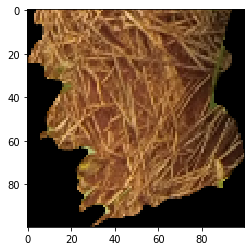

In [24]:
plt.imshow(X_train[3].reshape(100,100,3))

In [25]:
model = Sequential()
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
model.fit(X_train, y_train, batch_size=100,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 10735 samples, validate on 4601 samples
Epoch 1/50
10735/10735 [==============================] - 33s 3ms/step - loss: 1.0888 - acc: 0.5690 - val_loss: 0.7683 - val_acc: 0.6925
Epoch 2/50
10735/10735 [==============================] - 33s 3ms/step - loss: 0.7367 - acc: 0.7000 - val_loss: 0.6601 - val_acc: 0.7559
Epoch 3/50
10735/10735 [==============================] - 33s 3ms/step - loss: 0.6424 - acc: 0.7421 - val_loss: 0.5717 - val_acc: 0.8053
Epoch 4/50
10735/10735 [==============================] - 33s 3ms/step - loss: 0.5677 - acc: 0.7825 - val_loss: 0.5440 - val_acc: 0.7833
Epoch 5/50
10735/10735 [==============================] - 33s 3ms/step - loss: 0.5511 - acc: 0.7878 - val_loss: 0.5287 - val_acc: 0.8055
Epoch 6/50
10735/10735 [==============================] - 33s 3ms/step - loss: 0.5199 - acc: 0.8000 - v